In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


DATASET

In [2]:
# Fuel consumption dataset
df = pd.read_csv("./FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Data summarization
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Selected features
features = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
features.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


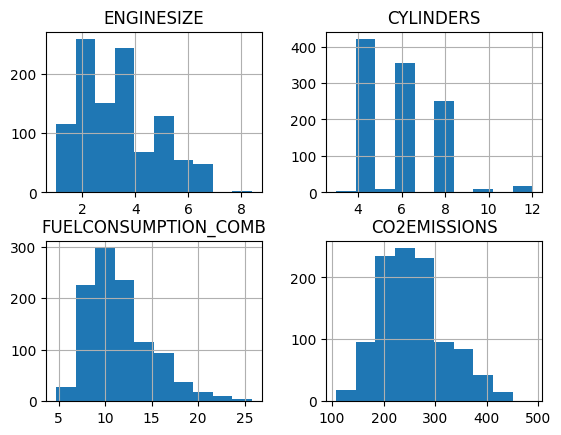

In [5]:
# Features histogram
featuresHist = features.hist()
plt.show()

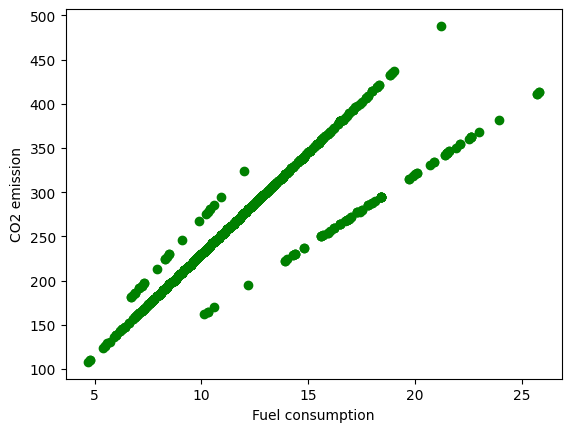

In [6]:
# Fuel consumption vs Emission
plt.scatter(features.FUELCONSUMPTION_COMB, features.CO2EMISSIONS, color = "green")
plt.xlabel("Fuel consumption")
plt.ylabel("CO2 emission")
plt.show()

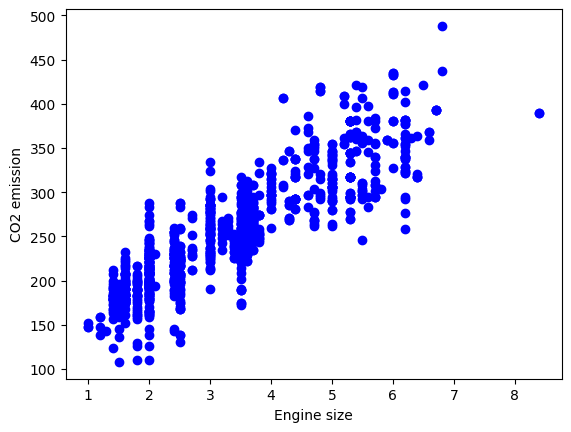

In [7]:
# Engine size vs Emission
plt.scatter(features.ENGINESIZE, features.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

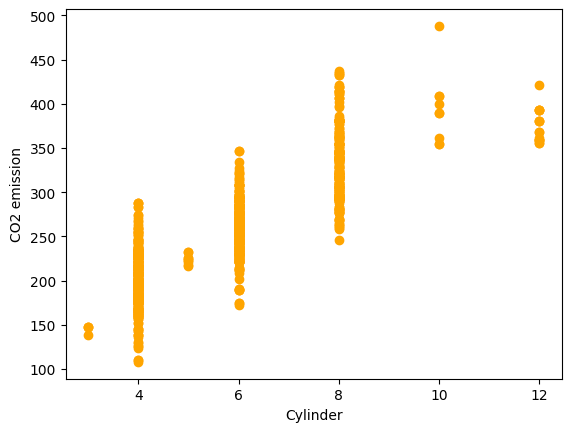

In [8]:
# Cylinder vs Emission
plt.scatter(features.CYLINDERS, features.CO2EMISSIONS, color = "orange")
plt.xlabel("Cylinder")
plt.ylabel("CO2 emission")
plt.show()

Create 80% TRAINING and 20% TESTING dataset

In [9]:
# Randomly select 80%
mask = np.random.rand(len(df)) < 0.8

trainSet = features[mask]
testSet = features[~mask]

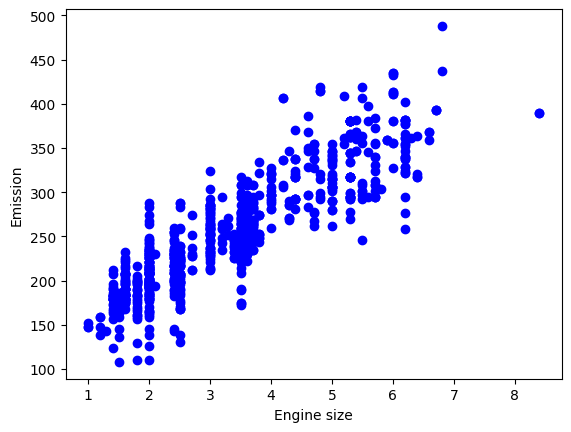

In [10]:
# Training set plot
plt.scatter(trainSet.ENGINESIZE, trainSet.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Modeling with sklearn

In [11]:
from sklearn import linear_model

# Emission from engine size Model
linRegModel = linear_model.LinearRegression()

trainX = np.asanyarray(trainSet[["ENGINESIZE"]])
trainY = np.asanyarray(trainSet[["CO2EMISSIONS"]])

linRegModel.fit(trainX, trainY)

# Coefficients and intercept
print("Coefficients: ", linRegModel.coef_)
print("Intercept: ", linRegModel.intercept_)

Coefficients:  [[39.27301406]]
Intercept:  [124.2594171]


Text(0, 0.5, 'Emission')

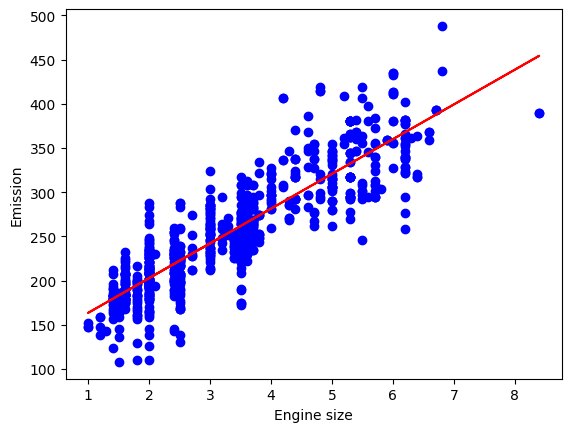

In [12]:
# Model output line plot
plt.scatter(trainSet.ENGINESIZE, trainSet.CO2EMISSIONS, color = "blue")
plt.plot(trainX, linRegModel.coef_[0][0] * trainX + linRegModel.intercept_[0], "-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

Model accuracy evaluation with Mean Squared Error (MSE)

In [13]:
from sklearn.metrics import r2_score

testX = np.asanyarray(testSet[["ENGINESIZE"]])
testY = np.asanyarray(testSet[["CO2EMISSIONS"]])

testYPredicted = linRegModel.predict(testX)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(testYPredicted - testY)))
print("Residual sum of squares (MSE): %.2f" % np.mean((testYPredicted - testY) ** 2))

# The higher the better the model fit the data
print("R2-score: %.2f" % r2_score(testY, testYPredicted))

Mean Absolute Error (MAE): 25.94
Residual sum of squares (MSE): 1098.55
R2-score: 0.71


In [14]:
# Emission from fuel consumption Model
linRegModel = linear_model.LinearRegression()

trainX = np.asanyarray(trainSet[["FUELCONSUMPTION_COMB"]])
trainY = np.asanyarray(trainSet[["CO2EMISSIONS"]])

linRegModel.fit(trainX, trainY)

# Coefficients and intercept
print("Coefficients: ", linRegModel.coef_)
print("Intercept: ", linRegModel.intercept_)

Coefficients:  [[16.04858369]]
Intercept:  [70.18049645]


Text(0, 0.5, 'Emission')

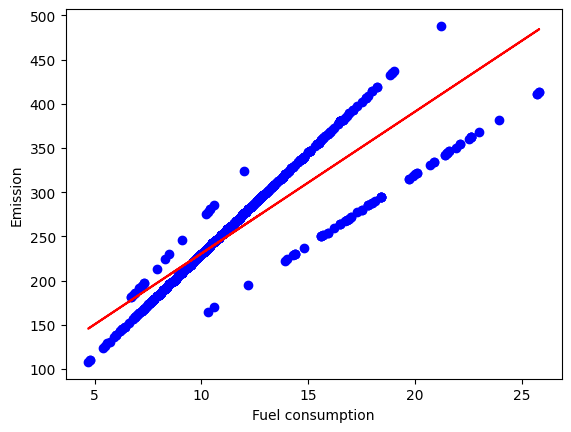

In [15]:
# Model output line plot
plt.scatter(trainSet.FUELCONSUMPTION_COMB, trainSet.CO2EMISSIONS, color = "blue")
plt.plot(trainX, linRegModel.coef_[0][0] * trainX + linRegModel.intercept_[0], "-r")
plt.xlabel("Fuel consumption")
plt.ylabel("Emission")

In [16]:
testX = np.asanyarray(testSet[["FUELCONSUMPTION_COMB"]])
testY = np.asanyarray(testSet[["CO2EMISSIONS"]])

testYPredicted = linRegModel.predict(testX)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(testYPredicted - testY)))
print("Residual sum of squares (MSE): %.2f" % np.mean((testYPredicted - testY) ** 2))

# The higher the better the model fit the data
print("R2-score: %.2f" % r2_score(testY, testYPredicted))

Mean Absolute Error (MAE): 21.03
Residual sum of squares (MSE): 853.49
R2-score: 0.77
